<a href="https://colab.research.google.com/github/sharif181/MNIST_dataset_object_detection/blob/main/MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels), (test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
def show_pic(num):
  plt.figure()
  plt.imshow(train_images[num])
  # plt.colorbar()
  plt.grid(False)
  plt.show()

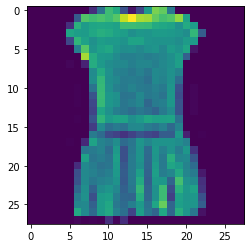

In [ ]:
show_pic(3)

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

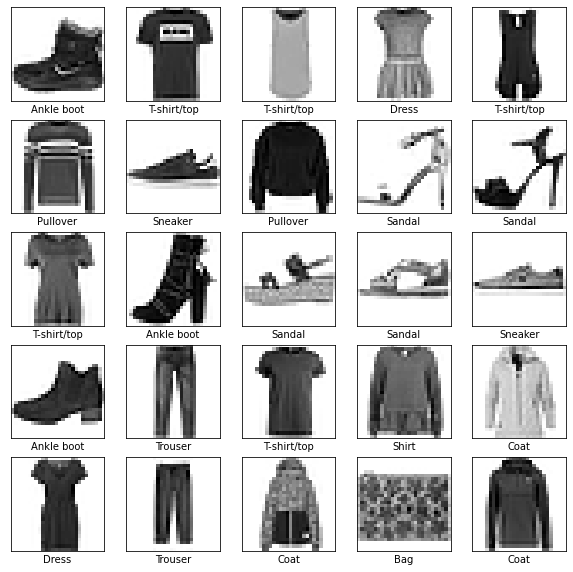

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4977 - accuracy: 0.8257
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3710 - accuracy: 0.8668
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3367 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3157 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2973 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2801 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2686 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2572 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2491 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3404 - accuracy: 0.8809

Test accuracy: 0.8809000253677368


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
predictions[0]

array([1.0759005e-09, 9.7013391e-13, 3.0918670e-11, 6.0624214e-11,
       8.8985541e-11, 5.5913901e-04, 6.8633341e-08, 3.0500742e-03,
       8.9700706e-08, 9.9639052e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

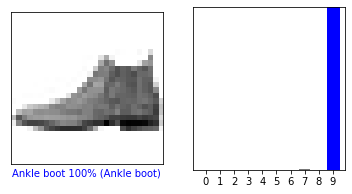

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

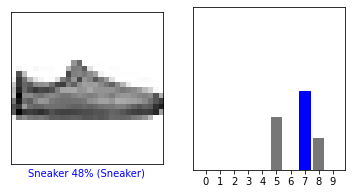

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

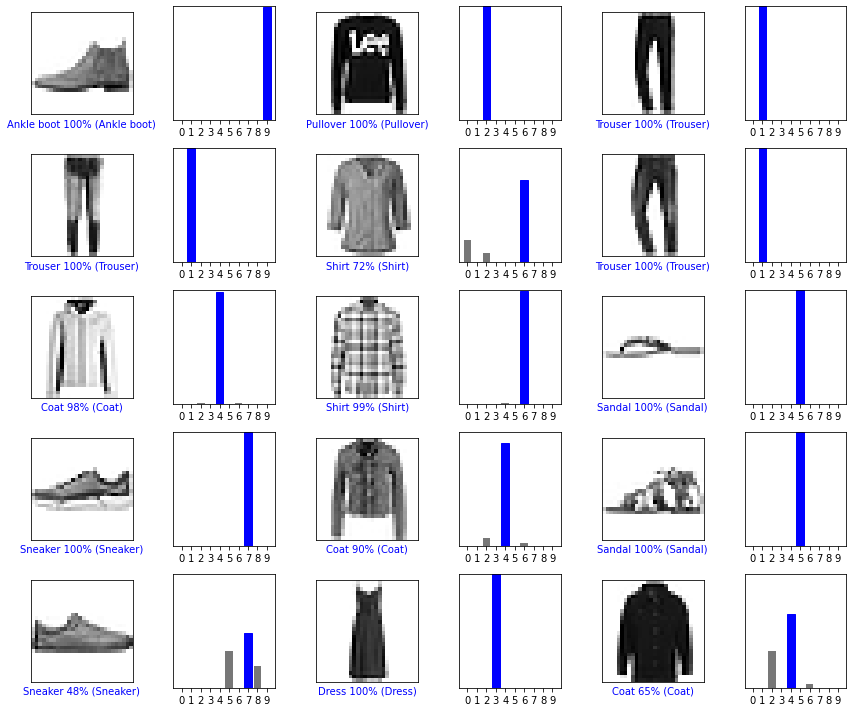

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()